In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x = np.linspace(0.1, 10, 100)
f1 = np.sin(x)
f2 = np.cos(x)

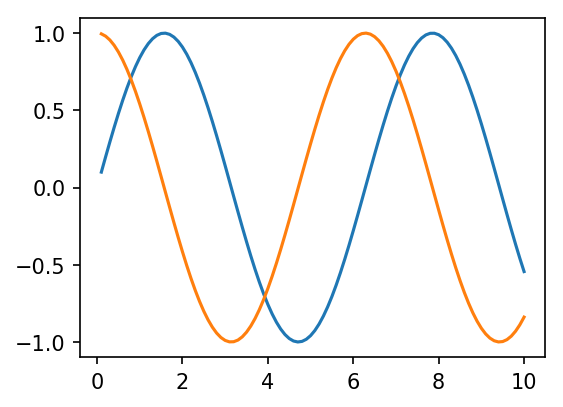

In [4]:
fig = plt.figure(figsize=(4, 3), dpi=150)
plt.plot(x, f1)
plt.plot(x, f2)
plt.show()

In [5]:
F = np.zeros((100, 2))
F[:, 0] = f1
F[:, 1] = f2

In [6]:
loading = np.random.normal(0, 1, [2, 6])
Y_true = np.matmul(F, loading)
Y = Y_true + np.random.normal(0, 0.2, [100, 6])

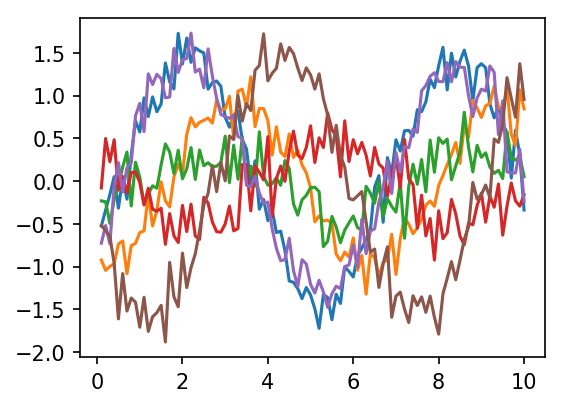

In [7]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for j in range(6):
    plt.plot(x, Y[:, j])
plt.show()

In [8]:
from sklearn.decomposition import PCA

In [9]:
latent_dim = 2
pca = PCA(n_components=latent_dim)
components = pca.fit_transform(Y)

In [10]:
Y_hat = pca.inverse_transform(components)
mse = np.mean((Y - Y_hat) ** 2)
print(mse)

0.02719580433912263


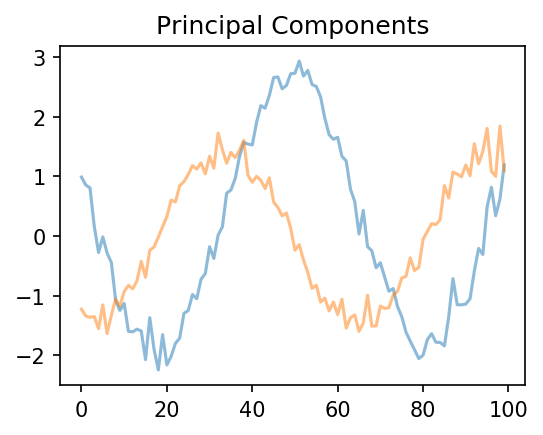

In [11]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for j in range(2):
    plt.plot(components[:, j], alpha=0.5)
plt.title('Principal Components')
plt.show()

In [12]:
from model import *

In [13]:
loading_matrix = np.random.normal(0, 1, [2, 6])
Y_variance = np.random.normal(0, 0.2, 6) ** 2
X = np.linspace(0.1, 10, 100).reshape((100, 1))  # create initial GP covariance matrices
cov1 = sample_covariance(X, 1.0, 1.0)  # length scale 1.0 corresponds to 10 time points
cov2 = sample_covariance(X, 1.0, 1.0)  # variance scale set to 1.0 as well
S1, S2, S3, S4 = build_covariance_blocks([cov1, cov2], loading_matrix, Y_variance)
F = sample_conditional_F(Y, S1, S2, S3, S4)

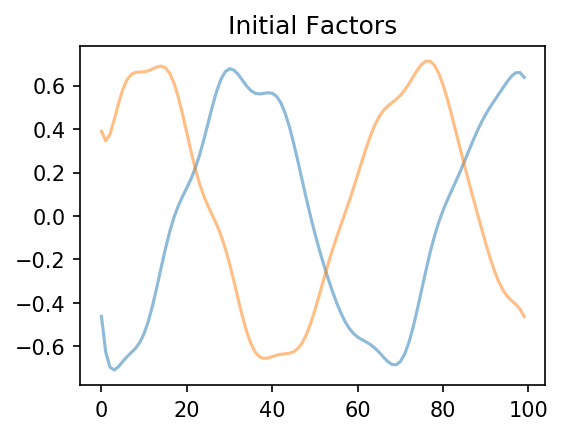

In [14]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for j in range(2):
    plt.plot(F[:, j], alpha=0.5)
plt.title('Initial Factors')
plt.show()

In [30]:
def run_model_sampler(Y, initial_F, n_iter):
    """
    Create model and run Gibbs sampler for n iterations.
    """
    F_sample = []
    loading_sample = []
    variance_sample = []
    trace_sample = []
    mse_history = []
    F = initial_F
    for i in tqdm(range(n_iter)):
        F, loading_matrix, Y_variance, gp_traces, mse = gibbs_sampling(F, Y, gprior_params=(20, 0.05))
        F_sample.append(F)
        loading_sample.append(loading_matrix)
        variance_sample.append(Y_variance)
        trace_sample.append(gp_traces)
        mse_history.append(mse)
    return F_sample, loading_sample, variance_sample, trace_sample, mse_history

In [38]:
results = run_model_sampler(Y, F, 200)

  0%|                                                                                          | 0/200 [00:00<?, ?it/s]

0.06240861660659083


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 419.81it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  0%|▍                                                                                 | 1/200 [00:04<14:49,  4.47s/it]

0.05081856397633335


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 320.67it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  1%|▊                                                                                 | 2/200 [00:11<17:04,  5.18s/it]

0.04737998897468693


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 447.95it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  2%|█▏                                                                                | 3/200 [00:16<17:24,  5.30s/it]

0.04385506137198


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 441.70it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  2%|█▋                                                                                | 4/200 [00:22<17:44,  5.43s/it]

0.047233014502057045


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 404.29it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  2%|██                                                                                | 5/200 [00:27<17:28,  5.38s/it]

0.04390014909913789


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 448.94it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  3%|██▍                                                                               | 6/200 [00:33<17:19,  5.36s/it]

0.0431182210488442


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 450.27it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  4%|██▊                                                                               | 7/200 [00:38<17:14,  5.36s/it]

0.04250270081778285


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 449.11it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  4%|███▎                                                                              | 8/200 [00:43<17:07,  5.35s/it]

0.04246671682097033


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 440.08it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  4%|███▋                                                                              | 9/200 [00:49<17:01,  5.35s/it]

0.043635919483122745


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 435.77it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  5%|████                                                                             | 10/200 [00:54<16:57,  5.36s/it]

0.04445170389492549


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 442.01it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  6%|████▍                                                                            | 11/200 [00:59<16:31,  5.24s/it]

0.04022920022042372


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 441.02it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  6%|████▊                                                                            | 12/200 [01:05<16:37,  5.31s/it]

0.044565187708022654


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 442.81it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  6%|█████▎                                                                           | 13/200 [01:10<16:36,  5.33s/it]

0.041970858514666524


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 386.26it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  7%|█████▋                                                                           | 14/200 [01:16<16:53,  5.45s/it]

0.042662055612273535


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 420.99it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  8%|██████                                                                           | 15/200 [01:21<16:50,  5.46s/it]

0.04262880332679566


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 439.44it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  8%|██████▍                                                                          | 16/200 [01:26<16:21,  5.34s/it]

0.043127713198397505


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 425.45it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  8%|██████▉                                                                          | 17/200 [01:32<16:26,  5.39s/it]

0.04188211090901292


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 433.43it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  9%|███████▎                                                                         | 18/200 [01:37<16:33,  5.46s/it]

0.04138942811646852


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 417.04it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 10%|███████▋                                                                         | 19/200 [01:43<16:34,  5.49s/it]

0.04125613078089579


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 395.13it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 10%|████████                                                                         | 20/200 [01:48<16:18,  5.44s/it]

0.04037620465778632


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 434.19it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 10%|████████▌                                                                        | 21/200 [01:54<16:21,  5.48s/it]

0.04227586858713023


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 424.85it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 11%|████████▉                                                                        | 22/200 [01:59<16:23,  5.53s/it]

0.04247685345544444


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 419.22it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 12%|█████████▎                                                                       | 23/200 [02:05<16:01,  5.43s/it]

0.042734380525140746


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 396.05it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 12%|█████████▋                                                                       | 24/200 [02:11<16:27,  5.61s/it]

0.04078594804570944


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 420.70it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 12%|██████████▏                                                                      | 25/200 [02:16<16:25,  5.63s/it]

0.040835699793004936


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 420.69it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 13%|██████████▌                                                                      | 26/200 [02:22<16:32,  5.70s/it]

0.0413067141202309


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 414.60it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 14%|██████████▉                                                                      | 27/200 [02:27<16:02,  5.56s/it]

0.04225056673244804


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 304.99it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 14%|███████████▎                                                                     | 28/200 [02:33<16:06,  5.62s/it]

0.039667847845572306


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 403.08it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 14%|███████████▋                                                                     | 29/200 [02:39<16:10,  5.67s/it]

0.04078053812570601


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 406.21it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 15%|████████████▏                                                                    | 30/200 [02:44<15:45,  5.56s/it]

0.04029260529394134


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 408.13it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 16%|████████████▌                                                                    | 31/200 [02:50<15:55,  5.65s/it]

0.0411335430164891


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 410.65it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 16%|████████████▉                                                                    | 32/200 [02:55<15:32,  5.55s/it]

0.04066151197429522


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 386.74it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 16%|█████████████▎                                                                   | 33/200 [03:02<15:59,  5.74s/it]

0.041192978978458875


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 382.20it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 17%|█████████████▊                                                                   | 34/200 [03:08<16:18,  5.89s/it]

0.042342187524300974


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 378.24it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 18%|██████████████▏                                                                  | 35/200 [03:13<15:53,  5.78s/it]

0.04281234811242243


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 385.76it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 18%|██████████████▌                                                                  | 36/200 [03:20<16:05,  5.89s/it]

0.04049900792558128


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 381.44it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 18%|██████████████▉                                                                  | 37/200 [03:26<16:10,  5.95s/it]

0.041123226092149114


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 349.45it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 19%|███████████████▍                                                                 | 38/200 [03:31<15:51,  5.87s/it]

0.04063172838187716


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 371.81it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 20%|███████████████▊                                                                 | 39/200 [03:38<16:06,  6.00s/it]

0.03999386129861692


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 356.80it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 20%|████████████████▏                                                                | 40/200 [03:44<16:00,  6.01s/it]

0.042272128797796335


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 343.56it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 20%|████████████████▌                                                                | 41/200 [03:50<16:27,  6.21s/it]

0.042452140267042325


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 383.91it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 21%|█████████████████                                                                | 42/200 [03:57<16:28,  6.26s/it]

0.04022851181408916


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 329.91it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 22%|█████████████████▍                                                               | 43/200 [04:03<16:10,  6.18s/it]

0.0419313802040082


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 362.19it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 22%|█████████████████▊                                                               | 44/200 [04:10<16:33,  6.37s/it]

0.04344012734454499


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 373.99it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 22%|██████████████████▏                                                              | 45/200 [04:15<15:56,  6.17s/it]

0.04071758405356998


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 323.00it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 23%|██████████████████▋                                                              | 46/200 [04:22<16:11,  6.31s/it]

0.04043605382836529


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 357.98it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 24%|███████████████████                                                              | 47/200 [04:28<16:14,  6.37s/it]

0.04081668922488439


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 343.86it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 24%|███████████████████▍                                                             | 48/200 [04:34<15:42,  6.20s/it]

0.03984585746840645


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 373.77it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 24%|███████████████████▊                                                             | 49/200 [04:40<15:34,  6.19s/it]

0.04146068995709071


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 384.16it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 25%|████████████████████▎                                                            | 50/200 [04:46<14:57,  5.98s/it]

0.04064530808100436


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 372.73it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 26%|████████████████████▋                                                            | 51/200 [04:52<14:59,  6.04s/it]

0.04083945556196254


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 377.06it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 26%|█████████████████████                                                            | 52/200 [04:58<14:36,  5.92s/it]

0.4504722494319728


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 370.44it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 26%|█████████████████████▍                                                           | 53/200 [05:04<14:58,  6.11s/it]

0.3504358223334915


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 366.04it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 27%|█████████████████████▊                                                           | 54/200 [05:11<15:11,  6.24s/it]

0.22119790536408554


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 350.99it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 28%|██████████████████████▎                                                          | 55/200 [05:17<14:54,  6.17s/it]

0.10368666448743026


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 377.02it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 28%|██████████████████████▋                                                          | 56/200 [05:23<14:57,  6.23s/it]

0.05095163046301235


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 351.09it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 28%|███████████████████████                                                          | 57/200 [05:29<14:44,  6.19s/it]

0.04247734025401503


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 367.83it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 29%|███████████████████████▍                                                         | 58/200 [05:36<14:51,  6.28s/it]

0.03936660665841932


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 378.12it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 30%|███████████████████████▉                                                         | 59/200 [05:41<14:16,  6.07s/it]

0.040555694303280904


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 384.40it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 30%|████████████████████████▎                                                        | 60/200 [05:48<14:19,  6.14s/it]

0.03953493893652154


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 385.13it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 30%|████████████████████████▋                                                        | 61/200 [05:53<13:42,  5.92s/it]

0.041027665713435295


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 396.43it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 31%|█████████████████████████                                                        | 62/200 [05:59<13:45,  5.98s/it]

0.04013865617417836


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 383.55it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 32%|█████████████████████████▌                                                       | 63/200 [06:05<13:14,  5.80s/it]

0.03991595873451719


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 359.70it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 32%|█████████████████████████▉                                                       | 64/200 [06:11<13:31,  5.97s/it]

0.04108805553619897


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 381.48it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 32%|██████████████████████████▎                                                      | 65/200 [06:16<13:04,  5.81s/it]

0.04095138205044633


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 389.62it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 33%|██████████████████████████▋                                                      | 66/200 [06:23<13:14,  5.93s/it]

0.039668262785532454


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 381.10it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 34%|███████████████████████████▏                                                     | 67/200 [06:28<12:49,  5.79s/it]

0.04038333682301783


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 379.06it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 34%|███████████████████████████▌                                                     | 68/200 [06:34<13:00,  5.91s/it]

0.039955241704585184


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 373.42it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 34%|███████████████████████████▉                                                     | 69/200 [06:40<12:38,  5.79s/it]

0.04065715401277737


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 383.55it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 35%|████████████████████████████▎                                                    | 70/200 [06:46<12:49,  5.92s/it]

0.039953463257082794


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 373.42it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 36%|████████████████████████████▊                                                    | 71/200 [06:51<12:26,  5.79s/it]

0.04019335888680903


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 380.27it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 36%|█████████████████████████████▏                                                   | 72/200 [06:58<12:37,  5.92s/it]

0.039483641538793725


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 373.07it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 36%|█████████████████████████████▌                                                   | 73/200 [07:03<12:14,  5.78s/it]

0.039676066274719396


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 376.58it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 37%|█████████████████████████████▉                                                   | 74/200 [07:09<12:26,  5.92s/it]

0.04094372239669714


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 372.39it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 38%|██████████████████████████████▍                                                  | 75/200 [07:15<12:04,  5.80s/it]

0.040673557920298885


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 388.25it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 38%|██████████████████████████████▊                                                  | 76/200 [07:21<12:20,  5.97s/it]

0.039276268620725446


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 348.55it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 38%|███████████████████████████████▏                                                 | 77/200 [07:27<12:05,  5.90s/it]

0.04092990405263245


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 382.68it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 39%|███████████████████████████████▌                                                 | 78/200 [07:33<12:13,  6.01s/it]

0.040234227274446345


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 383.89it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 40%|███████████████████████████████▉                                                 | 79/200 [07:39<11:49,  5.86s/it]

0.04042735344126966


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 373.64it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 40%|████████████████████████████████▍                                                | 80/200 [07:45<11:57,  5.98s/it]

0.039721749414746224


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 380.02it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 40%|████████████████████████████████▊                                                | 81/200 [07:51<11:34,  5.84s/it]

0.04051938192912705


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 374.59it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 41%|█████████████████████████████████▏                                               | 82/200 [07:57<11:44,  5.97s/it]

0.03951762567426076


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 367.38it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 42%|█████████████████████████████████▌                                               | 83/200 [08:02<11:24,  5.85s/it]

0.040845265599978545


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 365.59it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 42%|██████████████████████████████████                                               | 84/200 [08:08<11:13,  5.81s/it]

0.040928740867848


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 360.12it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 42%|██████████████████████████████████▍                                              | 85/200 [08:15<11:32,  6.02s/it]

0.040188670448719016


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 363.15it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 43%|██████████████████████████████████▊                                              | 86/200 [08:20<11:10,  5.88s/it]

0.039073221118551424


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 365.16it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 44%|███████████████████████████████████▏                                             | 87/200 [08:27<11:26,  6.08s/it]

0.0407048229216008


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 367.38it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 44%|███████████████████████████████████▋                                             | 88/200 [08:32<11:04,  5.94s/it]

0.039897275536213264


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 384.03it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 44%|████████████████████████████████████                                             | 89/200 [08:39<11:14,  6.08s/it]

0.04069248960761176


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 370.20it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 45%|████████████████████████████████████▍                                            | 90/200 [08:44<10:53,  5.94s/it]

0.039266891655543625


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 372.95it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 46%|████████████████████████████████████▊                                            | 91/200 [08:51<11:01,  6.07s/it]

0.04056499290297142


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 340.93it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 46%|█████████████████████████████████████▎                                           | 92/200 [08:57<10:51,  6.03s/it]

0.03909486619287583


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 362.84it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 46%|█████████████████████████████████████▋                                           | 93/200 [09:02<10:37,  5.96s/it]

0.04134944428146266


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 373.57it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 373.44it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
 47%|██████████████████████████████████████                                           | 94/200 [09:09<10:49,  6.12s/it]

0.04025441296940413


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 351.71it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 48%|██████████████████████████████████████▍                                          | 95/200 [09:15<10:30,  6.01s/it]

0.041236424400317266


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 371.93it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 48%|██████████████████████████████████████▉                                          | 96/200 [09:21<10:41,  6.17s/it]

0.040776296578393115


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 353.36it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 48%|███████████████████████████████████████▎                                         | 97/200 [09:27<10:24,  6.07s/it]

0.04087483659852258


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 351.91it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 49%|███████████████████████████████████████▋                                         | 98/200 [09:34<10:34,  6.22s/it]

0.0410380336012633


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 351.91it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 50%|████████████████████████████████████████                                         | 99/200 [09:39<10:14,  6.08s/it]

0.03997596737656829


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 353.45it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 50%|████████████████████████████████████████                                        | 100/200 [09:45<09:57,  5.98s/it]

0.03964280764811292


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 356.91it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 50%|████████████████████████████████████████▍                                       | 101/200 [09:52<10:12,  6.19s/it]

0.04056016174656791


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 354.27it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 51%|████████████████████████████████████████▊                                       | 102/200 [09:58<09:54,  6.06s/it]

0.040357221931824186


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 360.99it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 52%|█████████████████████████████████████████▏                                      | 103/200 [10:04<10:06,  6.25s/it]

0.04013286439273229


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 326.77it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 52%|█████████████████████████████████████████▌                                      | 104/200 [10:10<09:54,  6.19s/it]

0.04075703395758471


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 348.34it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 52%|██████████████████████████████████████████                                      | 105/200 [10:17<10:07,  6.39s/it]

0.03988744336476489


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 353.56it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 53%|██████████████████████████████████████████▍                                     | 106/200 [10:23<09:47,  6.25s/it]

0.04003717898382528


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 350.68it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 54%|██████████████████████████████████████████▊                                     | 107/200 [10:29<09:28,  6.11s/it]

0.040603148801130536


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 367.83it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 54%|███████████████████████████████████████████▏                                    | 108/200 [10:36<09:38,  6.29s/it]

0.039758677982346446


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 352.02it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 55%|███████████████████████████████████████████▌                                    | 109/200 [10:41<09:19,  6.15s/it]

0.040749078286609744


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 352.12it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 55%|████████████████████████████████████████████                                    | 110/200 [10:48<09:27,  6.30s/it]

0.0394484432897614


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 353.78it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 56%|████████████████████████████████████████████▍                                   | 111/200 [10:54<09:09,  6.17s/it]

0.040328485170082744


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 351.18it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 56%|████████████████████████████████████████████▊                                   | 112/200 [11:00<08:52,  6.05s/it]

0.03992034838996464


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 357.99it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 56%|█████████████████████████████████████████████▏                                  | 113/200 [11:06<09:04,  6.26s/it]

0.04038365487210303


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 355.02it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 57%|█████████████████████████████████████████████▌                                  | 114/200 [11:12<08:47,  6.14s/it]

0.04016252095729765


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 349.15it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 57%|██████████████████████████████████████████████                                  | 115/200 [11:19<08:58,  6.34s/it]

0.03946541548642336


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 349.87it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 58%|██████████████████████████████████████████████▍                                 | 116/200 [11:25<08:41,  6.21s/it]

0.0402793393322409


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 356.92it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 58%|██████████████████████████████████████████████▊                                 | 117/200 [11:31<08:24,  6.08s/it]

0.03992447934460137


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 362.18it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 59%|███████████████████████████████████████████████▏                                | 118/200 [11:38<08:36,  6.30s/it]

0.03939285567651532


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 333.47it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 60%|███████████████████████████████████████████████▌                                | 119/200 [11:44<08:21,  6.20s/it]

0.040060640079615115


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 316.38it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 60%|████████████████████████████████████████████████                                | 120/200 [11:51<08:35,  6.44s/it]

0.042426793799313425


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 352.84it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 60%|████████████████████████████████████████████████▍                               | 121/200 [11:57<08:18,  6.31s/it]

0.03992500868636293


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 348.03it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 61%|████████████████████████████████████████████████▊                               | 122/200 [12:02<08:01,  6.17s/it]

0.04085608292486855


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 332.91it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 62%|█████████████████████████████████████████████████▏                              | 123/200 [12:10<08:18,  6.47s/it]

0.039707498430765806


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 350.86it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 62%|█████████████████████████████████████████████████▌                              | 124/200 [12:16<07:59,  6.31s/it]

0.04122032592045258


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 345.04it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 324.67it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
 62%|██████████████████████████████████████████████████                              | 125/200 [12:22<07:47,  6.23s/it]

0.041017122998713414


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 354.60it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 63%|██████████████████████████████████████████████████▍                             | 126/200 [12:28<07:56,  6.43s/it]

0.04127682368498551


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 335.80it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 64%|██████████████████████████████████████████████████▊                             | 127/200 [12:34<07:39,  6.29s/it]

0.04161808860606616


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 353.19it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 64%|███████████████████████████████████████████████████▏                            | 128/200 [12:41<07:45,  6.47s/it]

0.03968776228059297


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 340.85it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 64%|███████████████████████████████████████████████████▌                            | 129/200 [12:47<07:28,  6.32s/it]

0.04079109988064244


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 344.55it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 65%|████████████████████████████████████████████████████                            | 130/200 [12:53<07:13,  6.20s/it]

0.039786200636592994


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 335.80it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 66%|████████████████████████████████████████████████████▍                           | 131/200 [13:00<07:23,  6.42s/it]

0.04065858303488552


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 338.07it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 66%|████████████████████████████████████████████████████▊                           | 132/200 [13:06<07:08,  6.29s/it]

0.03955422210907169


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 337.03it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 66%|█████████████████████████████████████████████████████▏                          | 133/200 [13:12<06:53,  6.18s/it]

0.03998492312412048


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 360.12it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 67%|█████████████████████████████████████████████████████▌                          | 134/200 [13:19<07:05,  6.45s/it]

0.04130368886995177


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 341.40it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 68%|██████████████████████████████████████████████████████                          | 135/200 [13:25<06:51,  6.32s/it]

0.039427241452134526


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 336.17it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 68%|██████████████████████████████████████████████████████▍                         | 136/200 [13:31<06:38,  6.23s/it]

0.04053108381551752


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 357.13it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 68%|██████████████████████████████████████████████████████▊                         | 137/200 [13:38<06:50,  6.52s/it]

0.039710039759276616


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 342.69it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 69%|███████████████████████████████████████████████████████▏                        | 138/200 [13:44<06:34,  6.37s/it]

0.040695325453771324


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 341.07it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 70%|███████████████████████████████████████████████████████▌                        | 139/200 [13:51<06:39,  6.55s/it]

0.04024499464730647


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 336.93it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 70%|████████████████████████████████████████████████████████                        | 140/200 [13:57<06:24,  6.41s/it]

0.039605154451726965


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 333.02it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 70%|████████████████████████████████████████████████████████▍                       | 141/200 [14:03<06:10,  6.27s/it]

0.03936992777475369


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 309.70it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 71%|████████████████████████████████████████████████████████▊                       | 142/200 [14:11<06:22,  6.59s/it]

0.040852477162179275


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 330.00it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 72%|█████████████████████████████████████████████████████████▏                      | 143/200 [14:17<06:08,  6.46s/it]

0.04025266475086993


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 338.35it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 72%|█████████████████████████████████████████████████████████▌                      | 144/200 [14:23<05:54,  6.33s/it]

0.04084549447353471


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 333.47it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 310.11it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
 72%|██████████████████████████████████████████████████████████                      | 145/200 [14:30<06:05,  6.64s/it]

0.041128983532518926


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 329.91it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 73%|██████████████████████████████████████████████████████████▍                     | 146/200 [14:36<05:49,  6.48s/it]

0.040509861093686574


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 333.65it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 74%|██████████████████████████████████████████████████████████▊                     | 147/200 [14:42<05:37,  6.36s/it]

0.04122738759571697


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 325.97it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 74%|███████████████████████████████████████████████████████████▏                    | 148/200 [14:50<05:43,  6.60s/it]

0.04028787706049673


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 342.98it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 74%|███████████████████████████████████████████████████████████▌                    | 149/200 [14:56<05:27,  6.42s/it]

0.039947037568110653


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 326.42it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 75%|████████████████████████████████████████████████████████████                    | 150/200 [15:02<05:14,  6.29s/it]

0.04027291937534033


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 338.73it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 76%|████████████████████████████████████████████████████████████▍                   | 151/200 [15:09<05:20,  6.55s/it]

0.04055651889554614


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 333.02it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 76%|████████████████████████████████████████████████████████████▊                   | 152/200 [15:15<05:07,  6.41s/it]

0.04057543878454428


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 301.33it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 76%|█████████████████████████████████████████████████████████████▏                  | 153/200 [15:21<04:58,  6.34s/it]

0.23771967556447804


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 341.23it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 77%|█████████████████████████████████████████████████████████████▌                  | 154/200 [15:28<05:04,  6.61s/it]

0.0724392522068379


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 356.28it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 78%|██████████████████████████████████████████████████████████████                  | 155/200 [15:34<04:49,  6.43s/it]

0.0459955625088159


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 376.22it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 78%|██████████████████████████████████████████████████████████████▍                 | 156/200 [15:40<04:34,  6.25s/it]

0.04289615451592285


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 364.48it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 78%|██████████████████████████████████████████████████████████████▊                 | 157/200 [15:47<04:40,  6.53s/it]

0.04177698441743243


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 342.78it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 79%|███████████████████████████████████████████████████████████████▏                | 158/200 [15:53<04:28,  6.38s/it]

0.04283657032739683


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 351.37it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 80%|███████████████████████████████████████████████████████████████▌                | 159/200 [15:59<04:16,  6.27s/it]

0.040932431825144014


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 363.39it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 80%|████████████████████████████████████████████████████████████████                | 160/200 [16:07<04:25,  6.63s/it]

0.04244701129168793


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 333.66it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 80%|████████████████████████████████████████████████████████████████▍               | 161/200 [16:13<04:13,  6.51s/it]

0.042963406663383295


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 350.99it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 81%|████████████████████████████████████████████████████████████████▊               | 162/200 [16:19<04:00,  6.33s/it]

0.04268250599174614


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 362.52it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 82%|█████████████████████████████████████████████████████████████████▏              | 163/200 [16:26<04:03,  6.59s/it]

0.04110827062150468


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 341.14it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 82%|█████████████████████████████████████████████████████████████████▌              | 164/200 [16:32<03:52,  6.46s/it]

0.04116710114739296


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 339.22it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 82%|██████████████████████████████████████████████████████████████████              | 165/200 [16:38<03:42,  6.35s/it]

0.04122782638951119


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 359.48it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 83%|██████████████████████████████████████████████████████████████████▍             | 166/200 [16:46<03:45,  6.64s/it]

0.04081517602864516


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 338.45it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 84%|██████████████████████████████████████████████████████████████████▊             | 167/200 [16:52<03:34,  6.49s/it]

0.04061680213099489


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 343.86it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 84%|███████████████████████████████████████████████████████████████████▏            | 168/200 [16:58<03:23,  6.37s/it]

0.03986882569789911


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 359.91it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 84%|███████████████████████████████████████████████████████████████████▌            | 169/200 [17:05<03:25,  6.64s/it]

0.04174278128046956


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 337.78it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 85%|████████████████████████████████████████████████████████████████████            | 170/200 [17:11<03:15,  6.52s/it]

0.04272893981218217


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 342.69it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 86%|████████████████████████████████████████████████████████████████████▍           | 171/200 [17:18<03:05,  6.39s/it]

0.0417971200601912


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 328.81it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 86%|████████████████████████████████████████████████████████████████████▊           | 172/200 [17:25<03:09,  6.77s/it]

0.04275833289093731


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 341.72it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 86%|█████████████████████████████████████████████████████████████████████▏          | 173/200 [17:31<02:57,  6.58s/it]

0.04198095322950716


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 339.12it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 87%|█████████████████████████████████████████████████████████████████████▌          | 174/200 [17:37<02:47,  6.43s/it]

0.04312584935896945


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 334.31it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 88%|██████████████████████████████████████████████████████████████████████          | 175/200 [17:45<02:49,  6.76s/it]

0.04202232418583102


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 347.24it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 88%|██████████████████████████████████████████████████████████████████████▍         | 176/200 [17:51<02:38,  6.58s/it]

0.04124105877086591


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 355.54it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 88%|██████████████████████████████████████████████████████████████████████▊         | 177/200 [17:57<02:27,  6.41s/it]

0.0405108558560235


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 356.71it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 89%|███████████████████████████████████████████████████████████████████████▏        | 178/200 [18:04<02:26,  6.68s/it]

0.0412207523476235


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 320.24it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 90%|███████████████████████████████████████████████████████████████████████▌        | 179/200 [18:11<02:18,  6.57s/it]

0.0413710618404066


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 346.72it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 90%|████████████████████████████████████████████████████████████████████████        | 180/200 [18:17<02:08,  6.44s/it]

0.04166979867141225


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 341.91it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 90%|████████████████████████████████████████████████████████████████████████▍       | 181/200 [18:23<02:00,  6.34s/it]

0.041963921807436536


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 364.05it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 91%|████████████████████████████████████████████████████████████████████████▊       | 182/200 [18:30<02:00,  6.67s/it]

0.04399624964294725


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 339.87it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 92%|█████████████████████████████████████████████████████████████████████████▏      | 183/200 [18:37<01:51,  6.53s/it]

0.041136510794392886


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 350.36it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 92%|█████████████████████████████████████████████████████████████████████████▌      | 184/200 [18:43<01:42,  6.39s/it]

0.03992844659593531


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 362.19it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 92%|██████████████████████████████████████████████████████████████████████████      | 185/200 [18:50<01:40,  6.72s/it]

0.04069513436558445


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 342.60it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 93%|██████████████████████████████████████████████████████████████████████████▍     | 186/200 [18:56<01:32,  6.57s/it]

0.04119605763341914


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 350.15it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 94%|██████████████████████████████████████████████████████████████████████████▊     | 187/200 [19:03<01:23,  6.43s/it]

0.04201197676651957


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 353.55it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 94%|███████████████████████████████████████████████████████████████████████████▏    | 188/200 [19:10<01:21,  6.75s/it]

0.0402748089047128


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 347.92it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 94%|███████████████████████████████████████████████████████████████████████████▌    | 189/200 [19:16<01:12,  6.58s/it]

0.0417010207236829


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 338.60it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 95%|████████████████████████████████████████████████████████████████████████████    | 190/200 [19:22<01:04,  6.45s/it]

0.04207339577720698


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 340.93it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 96%|████████████████████████████████████████████████████████████████████████████▍   | 191/200 [19:30<01:00,  6.76s/it]

0.0415385505324618


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 335.43it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 96%|████████████████████████████████████████████████████████████████████████████▊   | 192/200 [19:36<00:52,  6.61s/it]

0.042121245771983534


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 340.07it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 96%|█████████████████████████████████████████████████████████████████████████████▏  | 193/200 [19:42<00:45,  6.52s/it]

0.0433412412564164


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 344.15it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 97%|█████████████████████████████████████████████████████████████████████████████▌  | 194/200 [19:49<00:38,  6.42s/it]

0.03981886659746857


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 366.48it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 98%|██████████████████████████████████████████████████████████████████████████████  | 195/200 [19:56<00:33,  6.75s/it]

0.04230792612186769


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 343.08it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 98%|██████████████████████████████████████████████████████████████████████████████▍ | 196/200 [20:02<00:26,  6.59s/it]

0.04138684741193831


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 352.78it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 98%|██████████████████████████████████████████████████████████████████████████████▊ | 197/200 [20:09<00:19,  6.58s/it]

0.04067554499738546


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 317.78it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 99%|███████████████████████████████████████████████████████████████████████████████▏| 198/200 [20:17<00:13,  6.98s/it]

0.03975460697762815


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 340.84it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████▌| 199/200 [20:23<00:06,  6.81s/it]

0.041602871984285646


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 343.25it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [20:29<00:00,  6.65s/it]


In [39]:
F_sample, loading_sample, variance_sample, trace_sample, mse_history = results

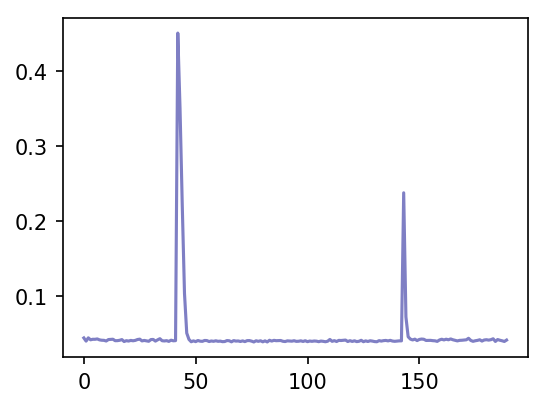

In [40]:
fig = plt.figure(figsize=(4, 3), dpi=150)
plt.plot(mse_history[10:], alpha=0.5, color='darkblue')
plt.show()

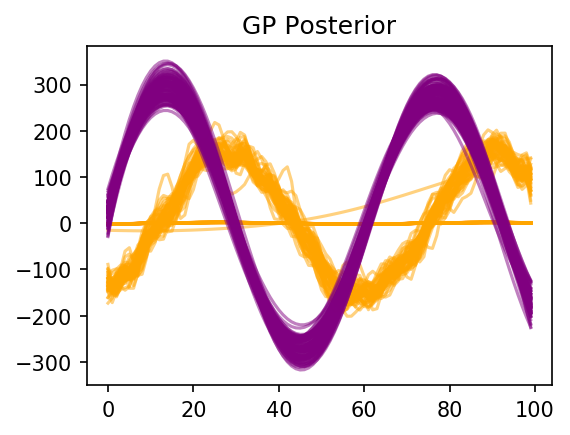

In [44]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for i in range(100, 200):
    plt.plot(F_sample[i][:, 0], alpha=0.5, color='orange')
for i in range(100, 200):
    plt.plot(F_sample[i][:, 1], alpha=0.5, color='purple')
#for j in range(2):
#    plt.plot(components[:, j], alpha=0.5, lw=4)
plt.title('GP Posterior')
plt.show()

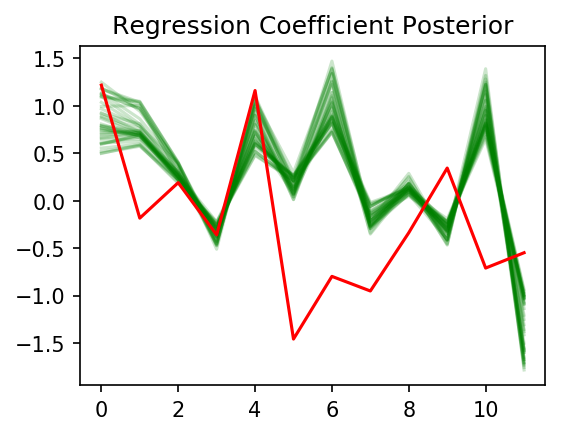

In [35]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for i in range(10, 50):
    plt.plot(loading_sample[i].flatten(), alpha=0.2, color='green')
plt.plot(loading.flatten(), color='red')
plt.title('Regression Coefficient Posterior')
plt.show()

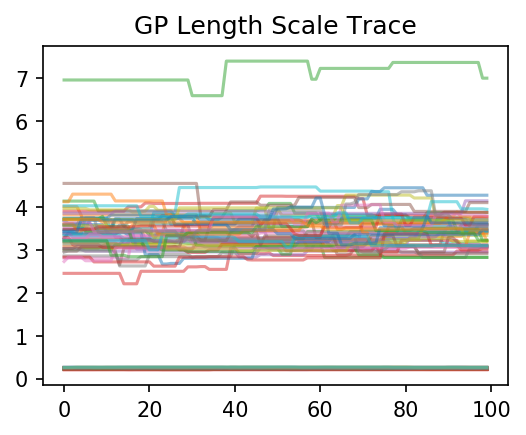

In [45]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for i in range(100, 200):
    plt.plot(trace_sample[i][0]['l'], alpha=0.5)
plt.title('GP Length Scale Trace')
plt.show()

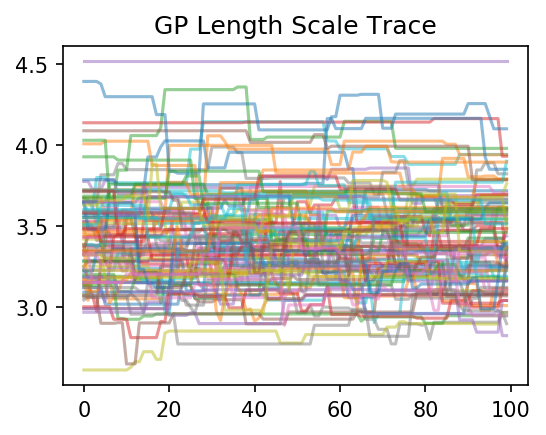

In [46]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for i in range(100, 200):
    plt.plot(trace_sample[i][1]['l'], alpha=0.5)
plt.title('GP Length Scale Trace')
plt.show()